In [1]:
import pandas as pd

folder_path = "/content/drive/MyDrive/routes/"
file_prefix = "routes_2023"
extension = ".csv"

def read_and_combine(months: list):
    frames = []
    for month in months:
        if month < 10:
            month_str = f"0{month}"
        else:
            month_str = str(month)
        file_path = f"{folder_path}{file_prefix}{month_str}{extension}"
        try:
            df = pd.read_csv(file_path)
            df['Month'] = month
            frames.append(df)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            continue
    return pd.concat(frames, ignore_index=True)

In [4]:
combined_data = read_and_combine(range(1,13))
combined_data.head()

<ipython-input-1-64b9c41dac8a>:16: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-1-64b9c41dac8a>:16: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-1-64b9c41dac8a>:16: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-1-64b9c41dac8a>:16: DtypeWarning: Columns (9,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,route_code,cyclenumber,userID,unlockedat,unlockedattime,lockedat,lockedattime,startstationserialnumber,startstationname,endstationserialnumber,endstationname,rfidnumber,length,DurationMinutes,CycleType,Membership,dateofbirth,PersonalIdCode,Month
0,1672542241293,2774,061d1938-8d26-4310-871a-d5c0e14f7420,2023-01-01,06:04:01,2023-01-01,06:22:25,47,Lossi,47,Savi,Mobile App,4.13,18.40,Bike,Joint Membership,1995,395.0,1
1,1672544085814,2655,b1eb3fb9-135f-4b3d-8367-d2a111036e0f,2023-01-01,06:34:45,2023-01-01,06:50:48,89,Savi,89,Raudteejaam,RFID Card,2.79,16.04,Bike,1 Year Membership,1979,379.0,1
2,1672544276043,2685,7218d08b-8875-4652-9667-b477e76e5101,2023-01-01,06:37:56,2023-01-01,06:47:53,29,Raudteejaam,29,Jakobsoni,RFID Card,1.03,9.97,Bike,1 Year Membership,1975,475.0,1
3,1672545243130,2690,945be27b-ada4-4a45-9b67-4b2104206b31,2023-01-01,06:54:03,2023-01-01,07:21:16,16,Rüütli,16,Raatuse,RFID Card,1.28,27.21,Bike,1 Year Membership,1983,383.0,1
4,1672545674443,2702,041ba7c3-685b-4bfd-b3d4-845d76624c56,2023-01-01,07:01:14,2023-01-01,07:11:30,12,Roosi,12,Kruusamäe,RFID Card,1.73,10.27,Bike,Joint Membership,2003,503.0,1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Pre processing**

         route_code    cyclenumber         length  DurationMinutes  \
count  6.581320e+05  658132.000000  658132.000000    658132.000000   
mean   1.690117e+12    3238.297305       2.884037        20.891605   
std    5.650898e+09     892.663445       2.696881      1004.121009   
min    1.672542e+12    2044.000000       0.000000         0.500000   
25%    1.686139e+12    2411.000000       1.090000         6.090000   
50%    1.690385e+12    3382.000000       2.230000        11.240000   
75%    1.694543e+12    4302.000000       3.870000        21.720000   
max    1.704056e+12    4971.000000      86.880000    735851.260000   

         dateofbirth          Month  
count  658132.000000  658132.000000  
mean     1994.289387       7.224886  
std        13.829755       2.153222  
min      1930.000000       1.000000  
25%      1987.000000       6.000000  
50%      2000.000000       7.000000  
75%      2005.000000       9.000000  
max      2009.000000      12.000000  


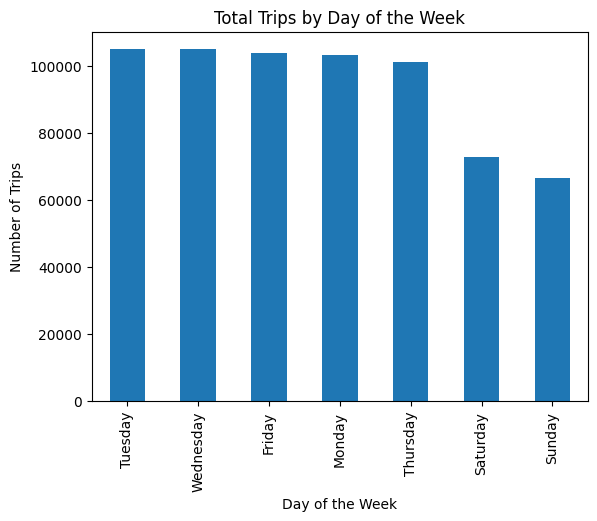

In [5]:
import matplotlib.pyplot as plt

print(combined_data.describe())

combined_data['unlockedat'] = pd.to_datetime(combined_data['unlockedat'])
combined_data['lockedat'] = pd.to_datetime(combined_data['lockedat'])

# Create a new column for the day of the week
combined_data['day_of_week'] = combined_data['unlockedat'].dt.day_name()

# Plot total trips per day of the week
weekly_usage = combined_data['day_of_week'].value_counts()
weekly_usage.plot(kind='bar')
plt.title('Total Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

In [6]:
data_july = read_and_combine([7])
print("Unique Start Stations:")
print(data_july['startstationname'].unique())

print("Unique End Stations:")
print(data_july['endstationname'].unique())

# Optionally, summarize the top stations by number of trips
print("Top Start Stations by Volume:")
print(data_july['startstationname'].value_counts().head(10))

print("Top End Stations by Volume:")
print(data_july['endstationname'].value_counts().head(10))

Unique Start Stations:
['Sõpruse sild' 'Soola' 'Annelinn' 'J. Hurda' 'Jakobsoni' 'Uueturu'
 'Aleksandri' 'Roosi' 'Näituse' 'Viie tee rist' 'Kalda tee' 'Sepa turg'
 'Kõrveküla' 'Rahu' 'Tarmeko' 'Tulbi' 'Aparaaditehas' 'Turusild'
 'Annelinna keskus' 'Kaare' 'Ränilinn' 'Pargi' 'Savi' 'Pirogovi plats'
 'Orava' 'Ringtee' 'Kivilinna' 'Kiigeplatsi' 'Luunja' 'Eeden'
 'Vanemuise park' 'Magistri' 'Sõbra' 'Kaunase puiestee' 'Lähte' 'Rüütli'
 'Anne saun' 'Raatuse kool' 'AHHAA' 'Vabadussild' 'Kopli' 'Annelinna kiir'
 'Torni' 'TÜ raamatukogu' 'Põhja puiestee' 'Aura veekeskus' 'Papli'
 'Ülejõe park' 'Raatuse' 'Veeriku' 'Kuu' 'Mõisavahe' 'Tähtvere spordipark'
 'Tammenurga' 'Tehnikaülikooli' 'Vahi' 'Tamme kool' 'Lossi' 'Ülenurme'
 'Kruusamäe' 'Karete' 'Postimaja' 'Ihaste Coop' 'Raudteejaam' 'Raja'
 'Linnupargi' 'Annelinna gümnaasium' 'Tamme staadion' 'Ujula' 'Tervise'
 'Tamme puiestee' 'Ihaste' 'Kaupmehe' 'Ilmatsalu' 'Kannikese' 'Nõlvaku'
 'Kvissentali' 'W. Ostwaldi' 'Delta' 'Undetermined' 'E-Kaubamaja

<ipython-input-1-64b9c41dac8a>:16: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [7]:
data_oct = read_and_combine([10])
print("Unique Start Stations:")
print(data_oct['startstationname'].unique())

print("Unique End Stations:")
print(data_oct['endstationname'].unique())

# Optionally, summarize the top stations by number of trips
print("Top Start Stations by Volume:")
print(data_oct['startstationname'].value_counts().head(10))

print("Top End Stations by Volume:")
print(data_oct['endstationname'].value_counts().head(10))

Unique Start Stations:
['Karete' 'Kivilinna' 'Rüütli' 'Aparaaditehas' 'Delta' 'Rahu'
 'Sõpruse sild' 'W. Ostwaldi' 'Roosi' 'Annelinna kiir' 'Annelinn' 'Kuu'
 'Ränilinn' 'Anne saun' 'Raja' 'Magistri' 'Aleksandri' 'Vanemuise park'
 'Raudteejaam' 'Tarmeko' 'K. E. von Baeri' 'Uueturu' 'Aura veekeskus'
 'Pargi' 'Ringtee' 'Mõisavahe' 'Annelinna keskus' 'Ilmatsalu'
 'Kaunase puiestee' 'Näituse' 'Lossi' 'Soola' 'Vabadussild' 'Kvissentali'
 'Riiamäe' 'TÜ raamatukogu' 'Kiigeplatsi' 'Kaupmehe' 'Kannikese'
 'J. Hurda' 'AHHAA' 'Kõrveküla' 'Papli' 'Tamme gümnaasium' 'Eeden'
 'Nõlvaku' 'Raatuse' 'Põhja puiestee' 'Tehnikaülikooli' 'Kalda tee'
 'Magaziini' 'Sepa turg' 'Rahinge' 'Orava' 'Tammenurga' 'Sõbra'
 'Linnupargi' 'Tähtvere spordipark' 'Tulbi' 'Savi' 'Maarjamõisa' 'Tervise'
 'Põllu' 'Viie tee rist' 'Pallase' 'Lõunakeskus' 'Torni' 'Pirogovi plats'
 'Veeriku' 'Külitse' 'E-Kaubamaja' 'Annelinna gümnaasium' 'Tamme kool'
 'Postimaja' 'Märja' 'Paju' 'Kaare' 'Turusild' 'Raatuse kool' 'Vahi'
 'EMÜ spordi

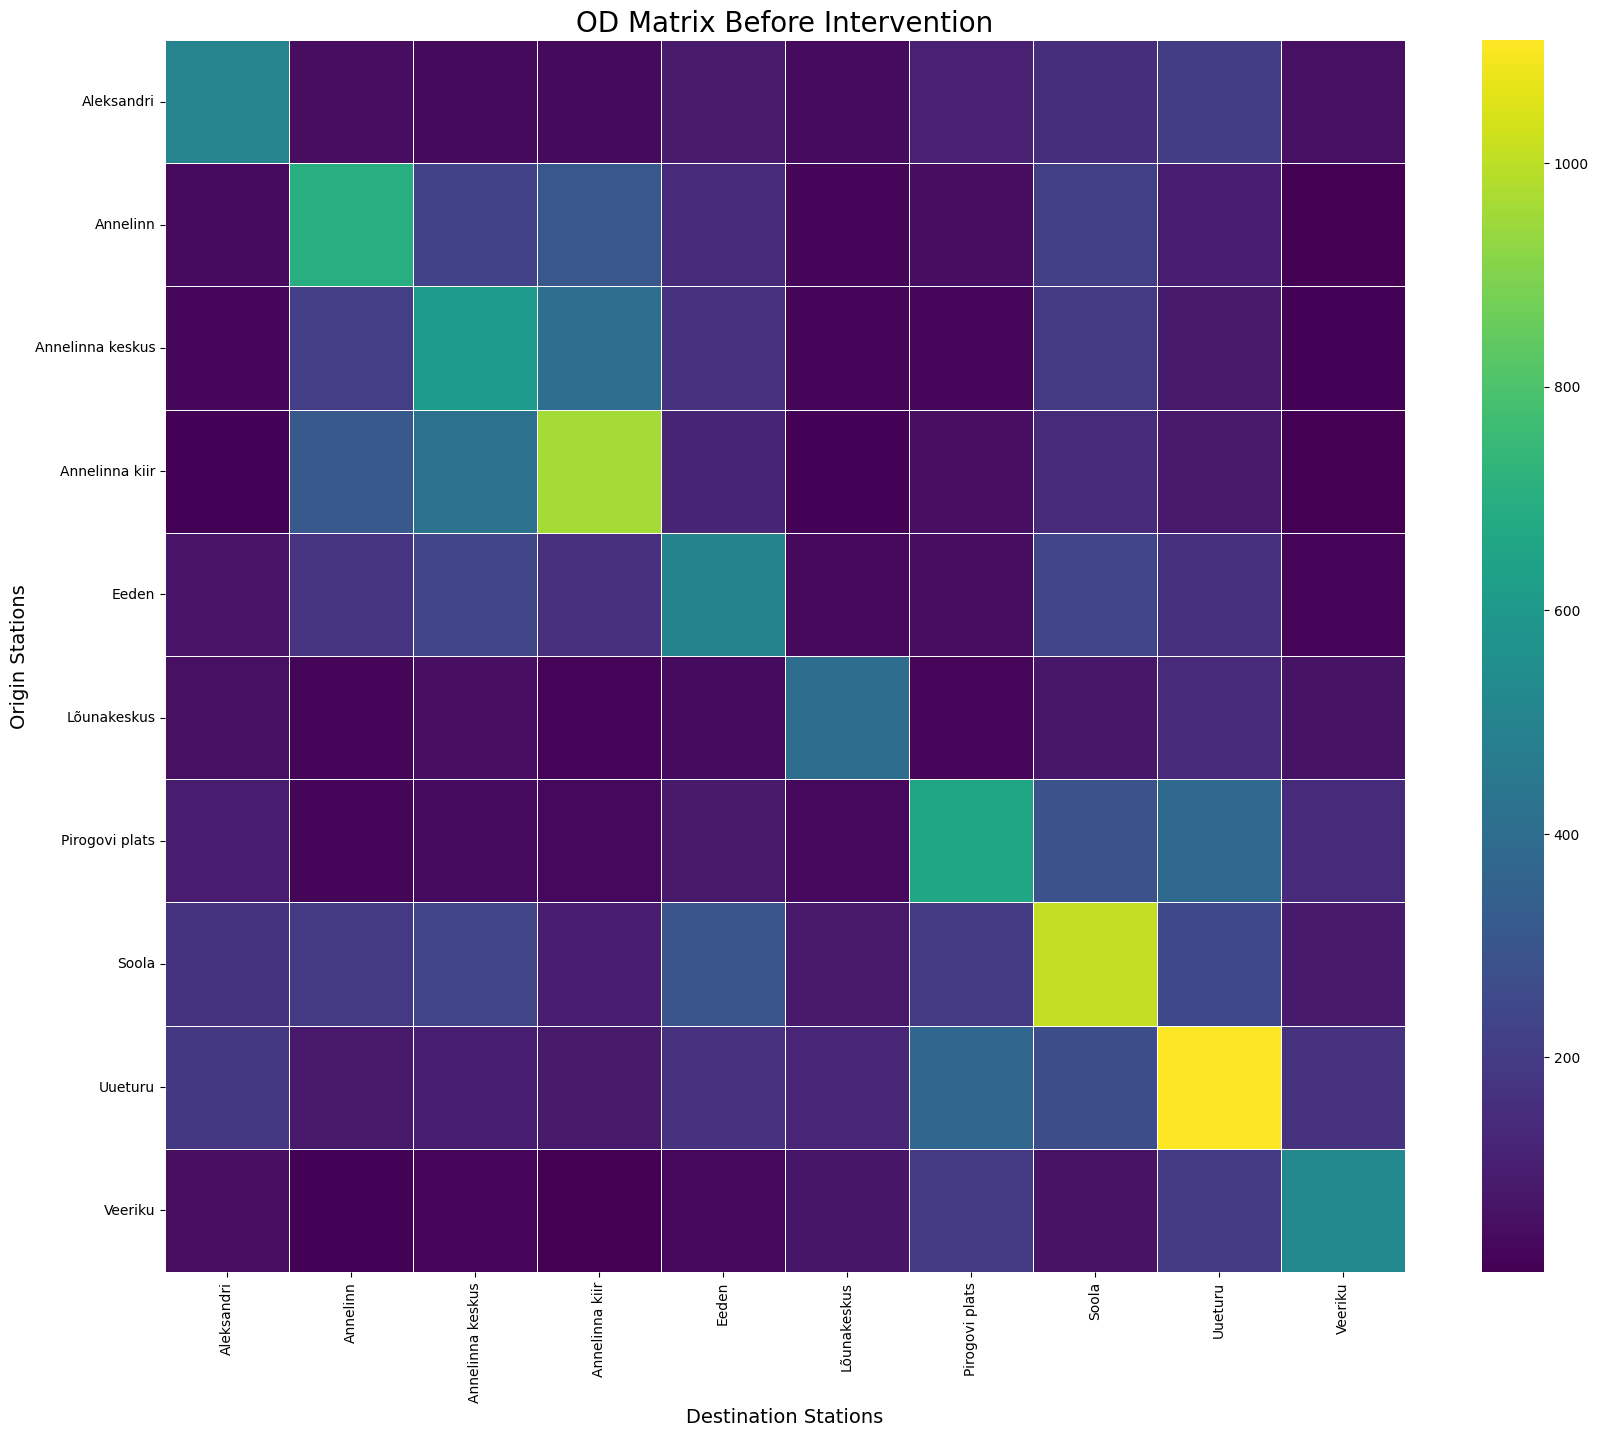

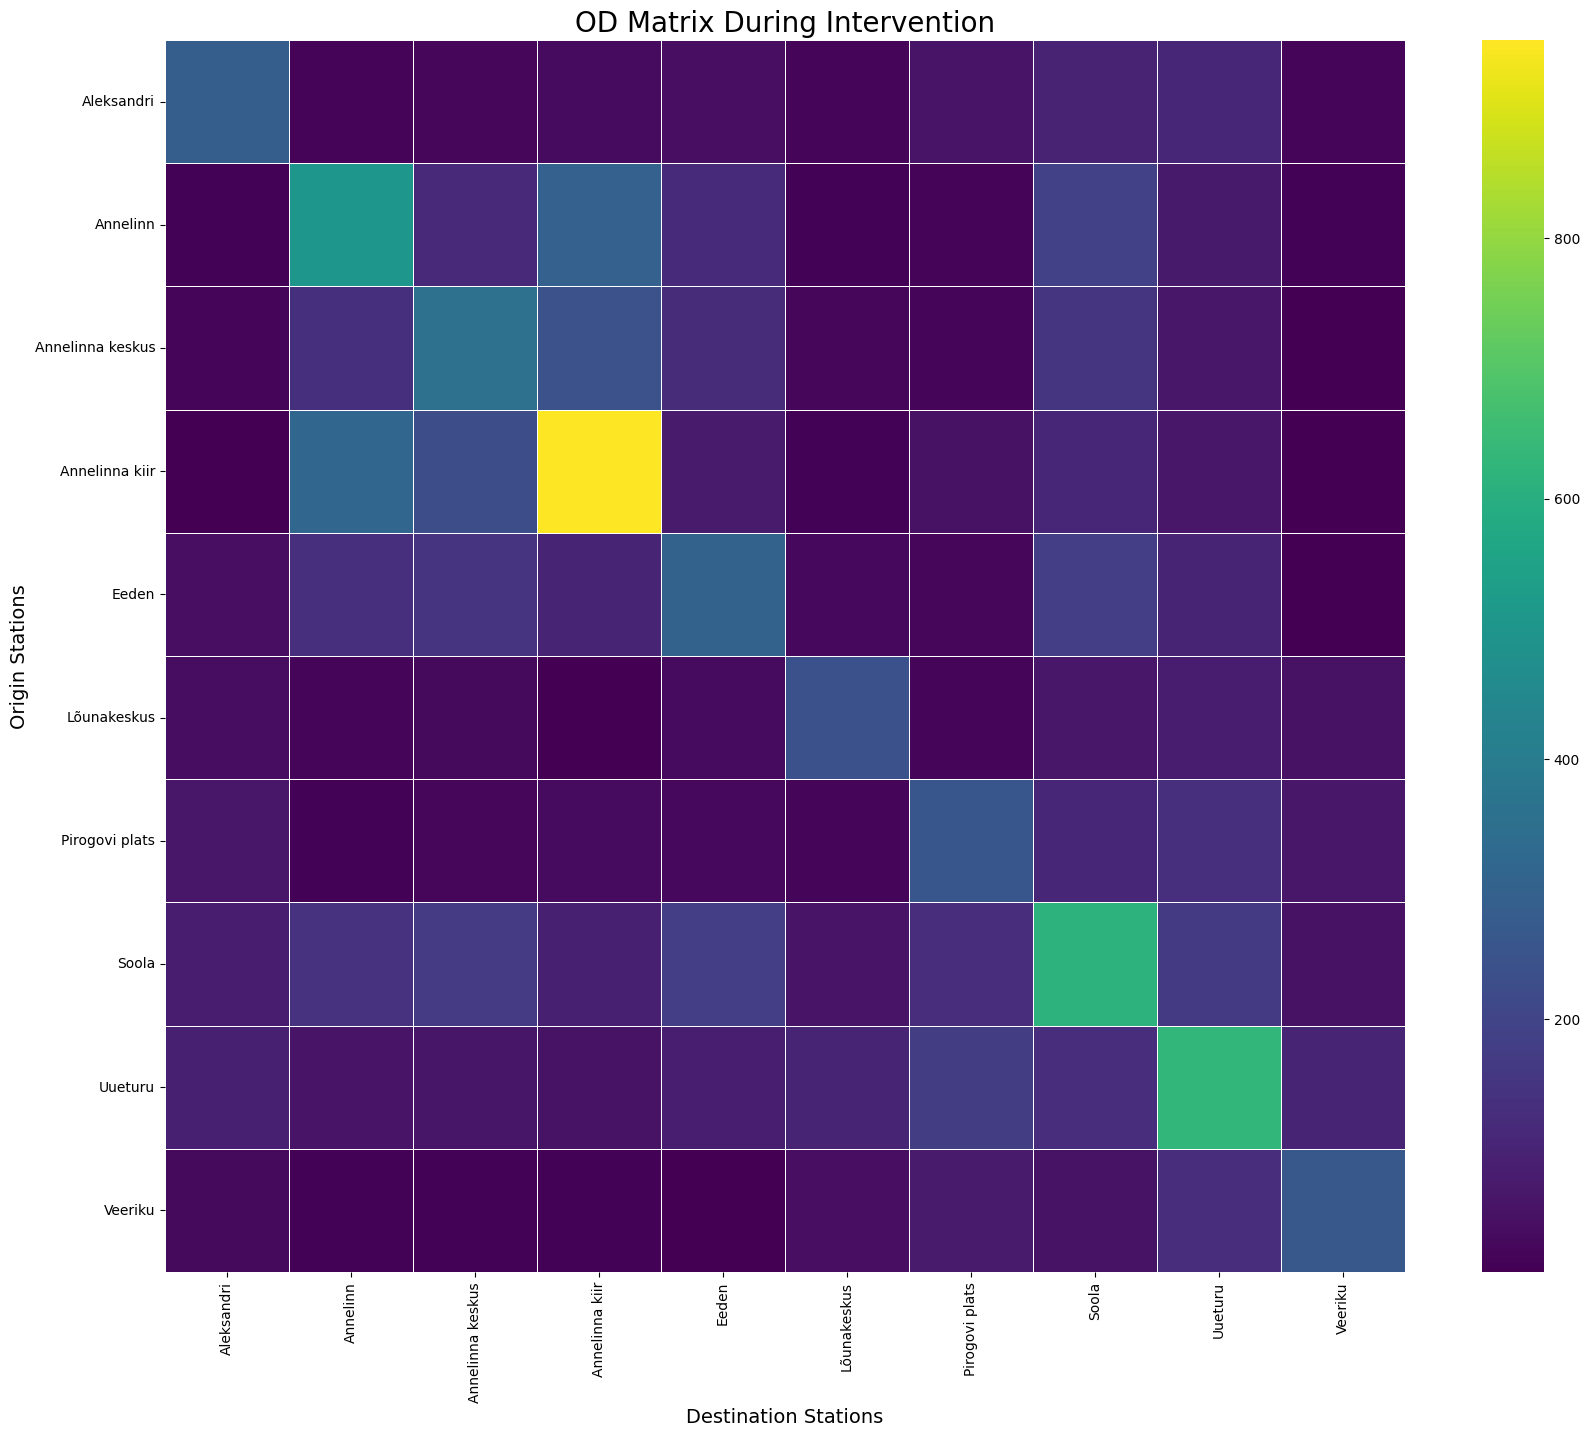

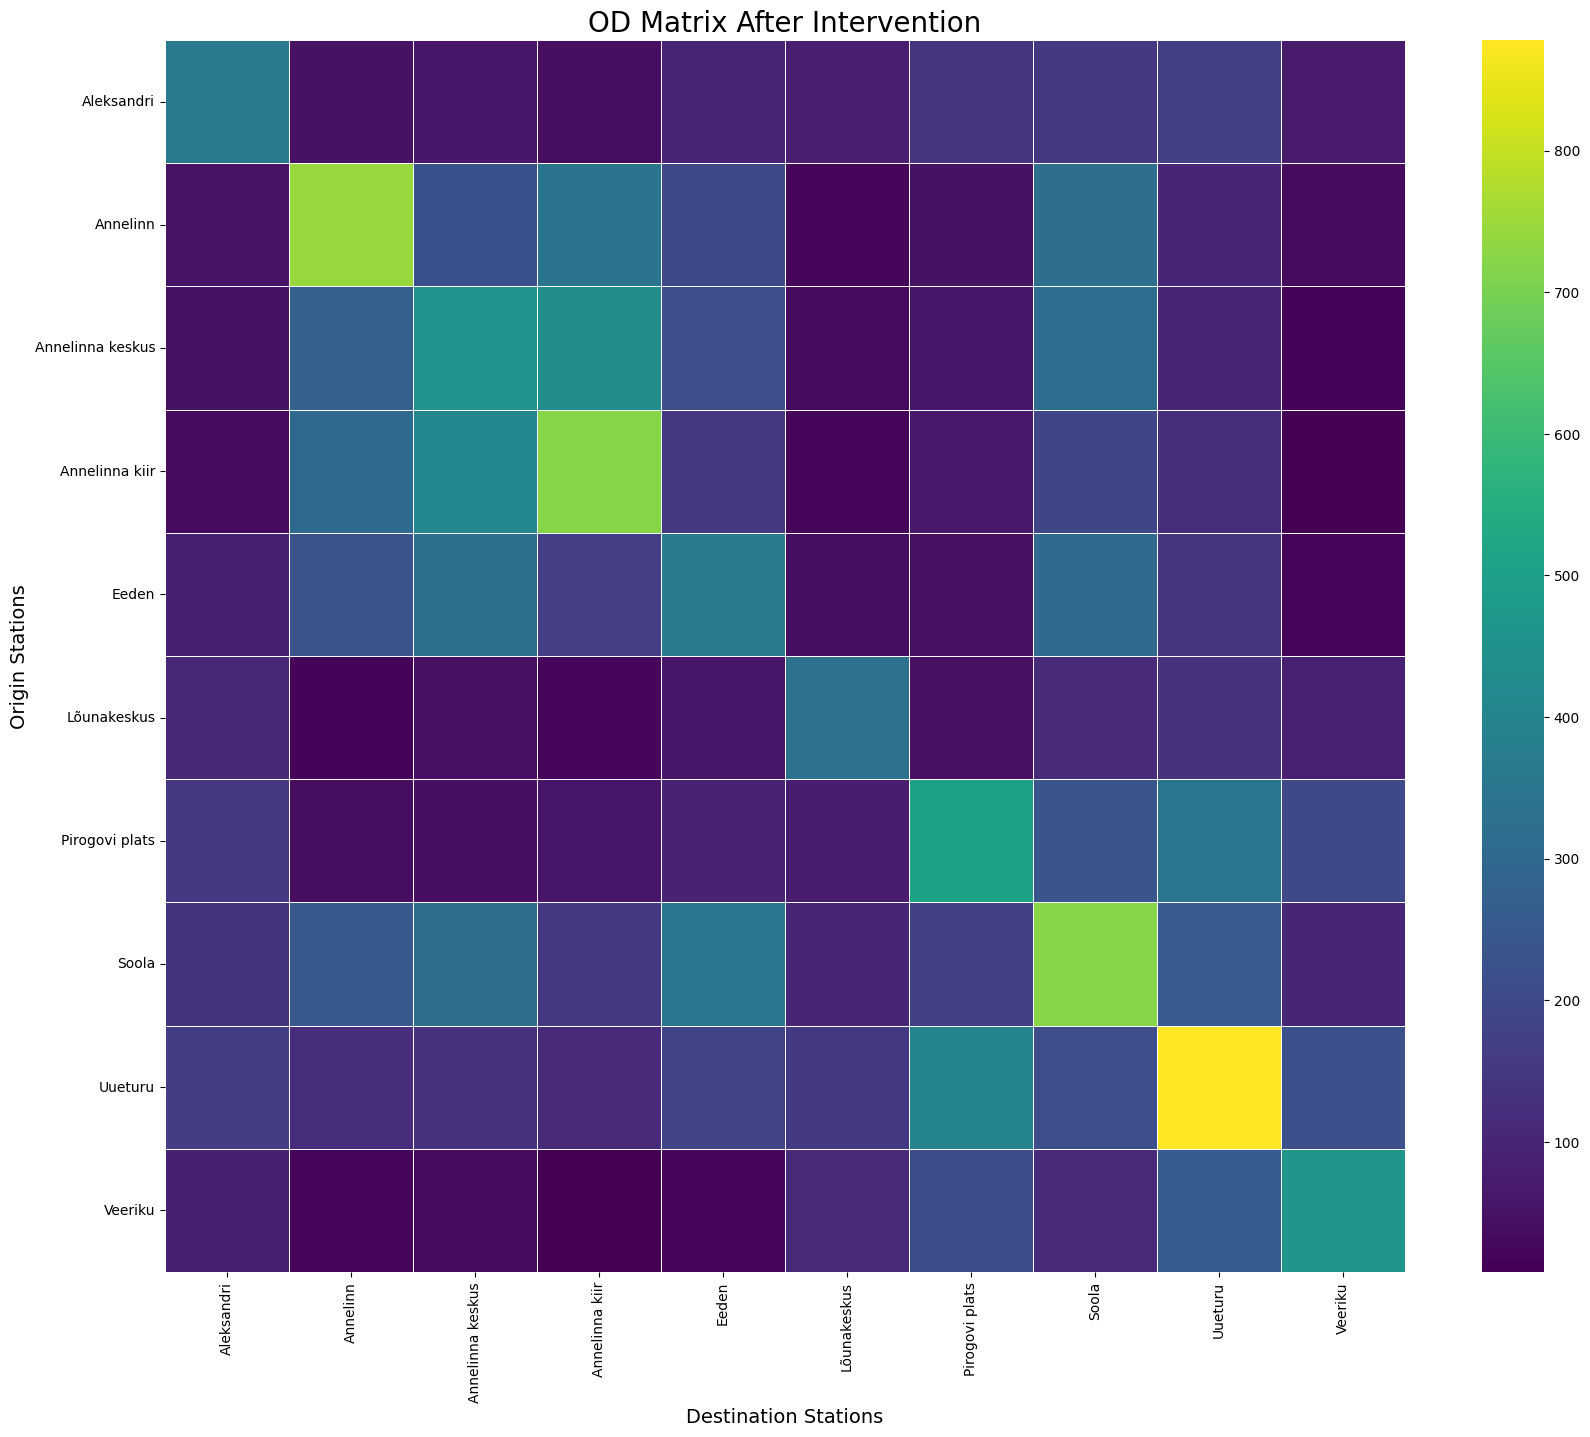

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define high-volume stations
high_volume_stations = ['Uueturu', 'Soola', 'Annelinna kiir', 'Eeden', 'Annelinn',
                        'Annelinna keskus', 'Lõunakeskus', 'Veeriku', 'Aleksandri', 'Pirogovi plats']

# Function to filter data based on high-volume stations
def filter_data(data, stations):
    # Ensure both start and end stations are in the list of high-volume stations
    return data[(data['startstationname'].isin(stations)) & (data['endstationname'].isin(stations))]

# Function to create OD matrix
def create_od_matrix(data, start_station_col, end_station_col):
    return data.pivot_table(index=start_station_col, columns=end_station_col,
                            values='route_code', aggfunc='count', fill_value=0)

# Assuming 'combined_data' is already loaded and 'unlockedat' has been converted to datetime type
before_period = (combined_data['unlockedat'] < '2023-06-29')
during_period = ((combined_data['unlockedat'] >= '2023-06-29') & (combined_data['unlockedat'] <= '2023-08-06'))
after_period = (combined_data['unlockedat'] > '2023-08-06')

# Filter data for each period based on high-volume stations
filtered_before = filter_data(combined_data[before_period], high_volume_stations)
filtered_during = filter_data(combined_data[during_period], high_volume_stations)
filtered_after = filter_data(combined_data[after_period], high_volume_stations)

# Create OD matrices for each filtered period
od_matrix_before = create_od_matrix(filtered_before, 'startstationname', 'endstationname')
od_matrix_during = create_od_matrix(filtered_during, 'startstationname', 'endstationname')
od_matrix_after = create_od_matrix(filtered_after, 'startstationname', 'endstationname')

# Plot heatmap function
def plot_heatmap(od_matrix, title):
    plt.figure(figsize=(20, 16))  # Increasing the figure size
    ax = sns.heatmap(od_matrix, cmap='viridis', annot=False, fmt="d", linewidths=.5)
    plt.title(title, fontsize=20)  # Increasing title font size
    plt.xlabel('Destination Stations', fontsize=14)  # Increasing x-axis label font size
    plt.ylabel('Origin Stations', fontsize=14)  # Increasing y-axis label font size
    plt.xticks(rotation=90, fontsize=10)  # Rotating and increasing font size of x-ticks
    plt.yticks(rotation=0, fontsize=10)  # Rotating and increasing font size of y-ticks
    plt.show()

# Plotting the heatmaps for each period
plot_heatmap(od_matrix_before, 'OD Matrix Before Intervention')
plot_heatmap(od_matrix_during, 'OD Matrix During Intervention')
plot_heatmap(od_matrix_after, 'OD Matrix After Intervention')


In [9]:
data = combined_data

data = data[['startstationname', 'endstationname', 'unlockedat']]


In [10]:
data['unlockedat'] = pd.to_datetime(data['unlockedat'])

data['day_of_week'] = data['unlockedat'].dt.day_name()

# Add a column for the month (if longer period data is available or needed)
data['month'] = data['unlockedat'].dt.month


<ipython-input-10-8f392176332f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unlockedat'] = pd.to_datetime(data['unlockedat'])
<ipython-input-10-8f392176332f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['unlockedat'].dt.day_name()
<ipython-input-10-8f392176332f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [11]:
data.head()

,startstationname,endstationname,unlockedat,day_of_week,month
0,Lossi,Savi,2023-01-01,Sunday,1
1,Savi,Raudteejaam,2023-01-01,Sunday,1
2,Raudteejaam,Jakobsoni,2023-01-01,Sunday,1
3,Rüütli,Raatuse,2023-01-01,Sunday,1
4,Roosi,Kruusamäe,2023-01-01,Sunday,1


In [12]:
relevant_months = data[data['month'].isin([5, 6, 7, 8, 9])]
high_volume_stations = ['Uueturu', 'Soola', 'Annelinna kiir', 'Eeden', 'Annelinn',
                        'Annelinna keskus', 'Lõunakeskus', 'Veeriku', 'Aleksandri', 'Pirogovi plats']

# Filter data to include only trips that start and end at these stations
filtered_data = data[(data['startstationname'].isin(high_volume_stations)) &
                     (data['endstationname'].isin(high_volume_stations))]

# Create OD matrices for each relevant month using the filtered data
od_matrices = {}
for month in sorted(filtered_data['month'].unique()):
    month_data = filtered_data[filtered_data['month'] == month]
    od_matrices[month] = month_data.pivot_table(index='startstationname', columns='endstationname',
                                                values='unlockedat', aggfunc='count', fill_value=0)


In [13]:
def calculate_cumulative_change(start_month, end_month):
    # Initialize the cumulative change matrix with zeros of the same shape as your OD matrices
    cumulative_change = pd.DataFrame(0, index=od_matrices[start_month].index, columns=od_matrices[start_month].columns)

    # Calculate the change for each interval and accumulate
    for month in range(start_month + 1, end_month + 1):
        prev_month = od_matrices.get(month - 1, pd.DataFrame(0, index=od_matrices[start_month].index, columns=od_matrices[start_month].columns))
        current_month = od_matrices.get(month, pd.DataFrame(0, index=od_matrices[start_month].index, columns=od_matrices[start_month].columns))

        # Adjust calculation to handle small numbers more robustly
        monthly_change = (current_month - prev_month) / (prev_month + 1) * 100  # Adding 1 to the denominator to avoid division by zero
        cumulative_change += monthly_change

    # Normalize by the number of intervals to get an average change per month
    average_monthly_change = cumulative_change / (end_month - start_month)
    return average_monthly_change


In [14]:
# Calculate changes between months around the event (assuming the presence of matrices for months 6, 7, 8)
change_june_to_july = (od_matrices.get(7, pd.DataFrame()) - od_matrices.get(6, pd.DataFrame())) / (od_matrices.get(6, pd.DataFrame()) + 0.001) * 100
change_july_to_august = (od_matrices.get(8, pd.DataFrame()) - od_matrices.get(7, pd.DataFrame())) / (od_matrices.get(7, pd.DataFrame()) + 0.001) * 100
# Calculate changes between May to July
change_may_to_july = calculate_cumulative_change(5,7)

# Calculate changes between July to september
change_july_to_september = calculate_cumulative_change(7,9)

# Calculate changes between May to september
change_may_to_september = calculate_cumulative_change(5,9)



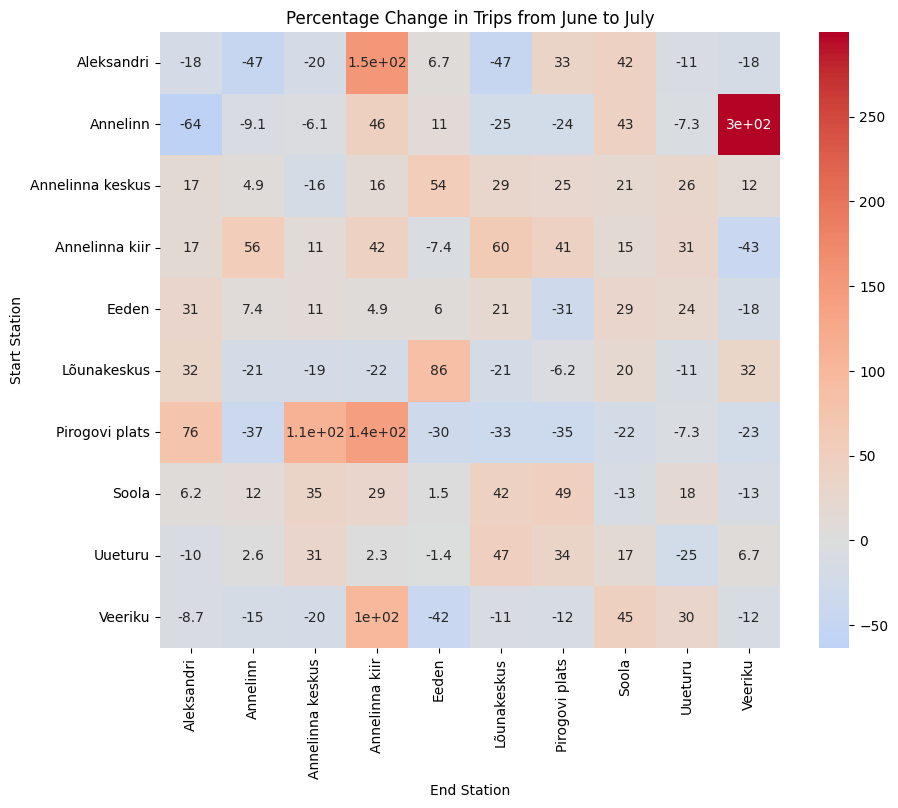

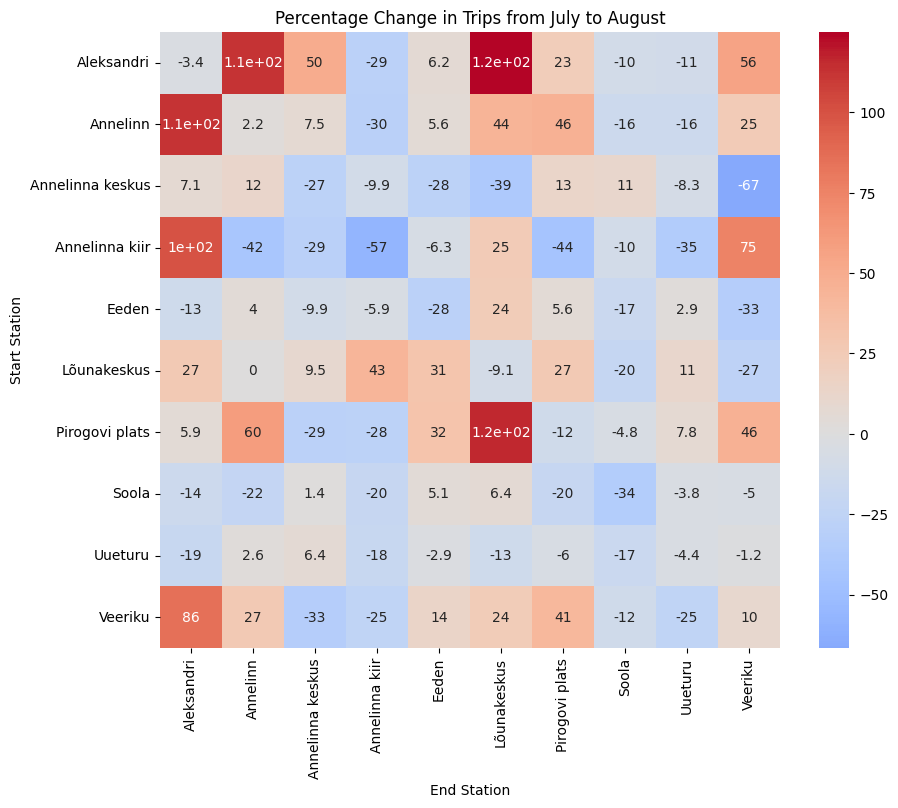

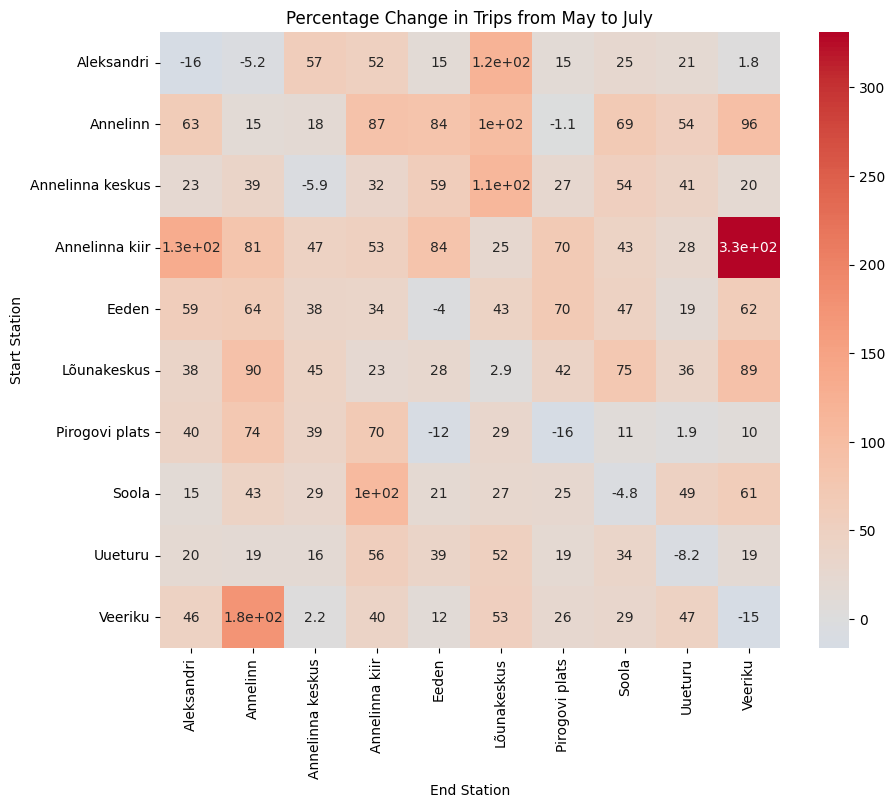

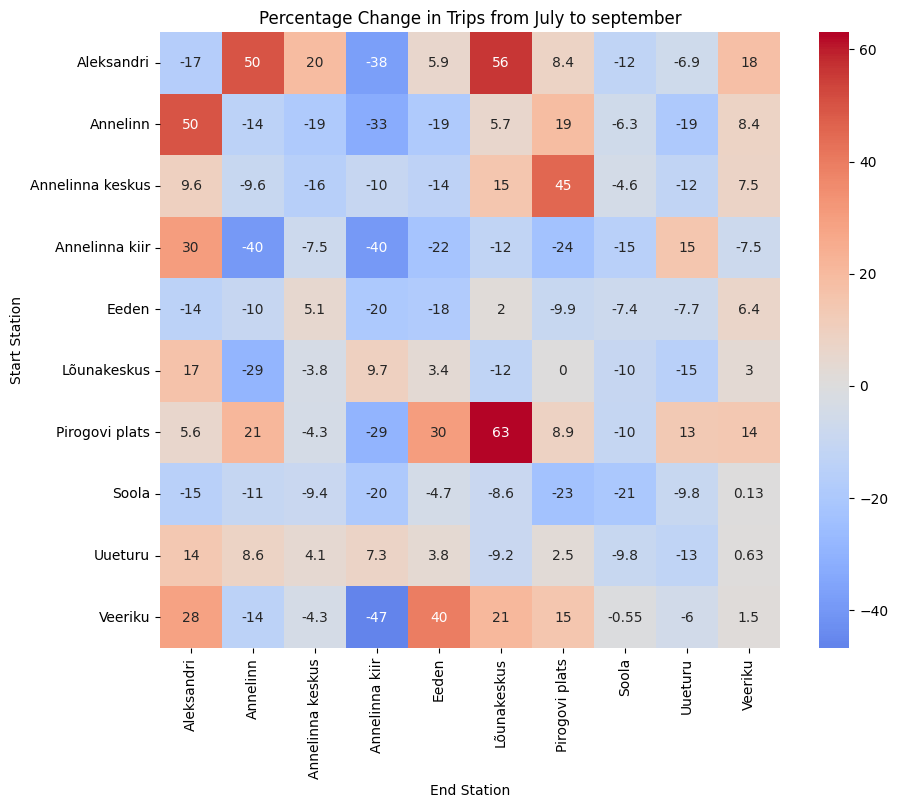

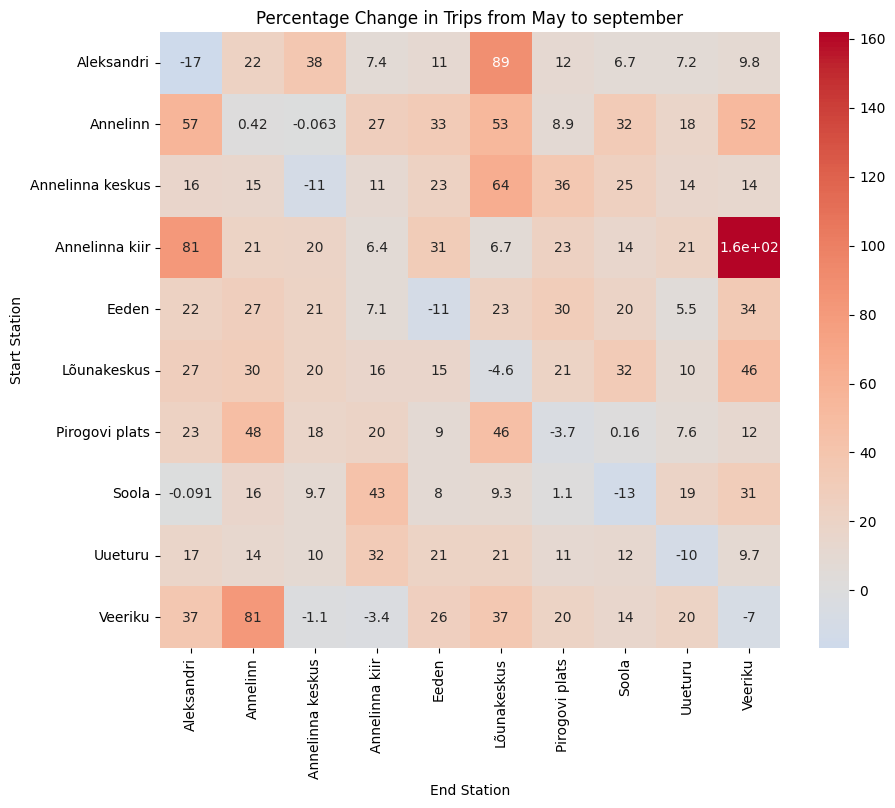

In [15]:
def plot_changes(change_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(change_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(title)
    plt.xlabel('End Station')
    plt.ylabel('Start Station')
    plt.show()

plot_changes(change_june_to_july, 'Percentage Change in Trips from June to July')
plot_changes(change_july_to_august, 'Percentage Change in Trips from July to August')

plot_changes(change_may_to_july, 'Percentage Change in Trips from May to July')
plot_changes(change_july_to_september, 'Percentage Change in Trips from July to september')
plot_changes(change_may_to_september, 'Percentage Change in Trips from May to september')


In [16]:
from datetime import datetime
df = combined_data

df = df[['startstationname', 'endstationname', 'unlockedat', 'lockedat', 'unlockedattime', 'lockedattime']]
# Function to clean and convert time
def clean_time(time_str):
    if '+' in time_str:
        time_str = time_str.split('+')[0]
    return datetime.strptime(time_str, '%H:%M:%S')

# Apply the cleaning function
df['unlockedattime'] = df['unlockedattime'].apply(clean_time)
df['lockedattime'] = df['lockedattime'].apply(clean_time)

# Function to calculate the duration in minutes
def calculate_duration(start_time, end_time):
    duration = (end_time - start_time).total_seconds() / 60
    return duration

# Apply the function to calculate duration
df['duration_minutes'] = df.apply(lambda row: calculate_duration(row['unlockedattime'], row['lockedattime']), axis=1)

df.head()

<ipython-input-16-44639af709f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unlockedattime'] = df['unlockedattime'].apply(clean_time)
<ipython-input-16-44639af709f0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lockedattime'] = df['lockedattime'].apply(clean_time)
<ipython-input-16-44639af709f0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,startstationname,endstationname,unlockedat,lockedat,unlockedattime,lockedattime,duration_minutes
0,Lossi,Savi,2023-01-01,2023-01-01,1900-01-01 06:04:01,1900-01-01 06:22:25,18.400000
1,Savi,Raudteejaam,2023-01-01,2023-01-01,1900-01-01 06:34:45,1900-01-01 06:50:48,16.050000
2,Raudteejaam,Jakobsoni,2023-01-01,2023-01-01,1900-01-01 06:37:56,1900-01-01 06:47:53,9.950000
3,Rüütli,Raatuse,2023-01-01,2023-01-01,1900-01-01 06:54:03,1900-01-01 07:21:16,27.216667
4,Roosi,Kruusamäe,2023-01-01,2023-01-01,1900-01-01 07:01:14,1900-01-01 07:11:30,10.266667


In [17]:
df['month'] = pd.to_datetime(df['unlockedat']).dt.month
df.head()


<ipython-input-17-72dc9b0e7d52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['unlockedat']).dt.month


,startstationname,endstationname,unlockedat,lockedat,unlockedattime,lockedattime,duration_minutes,month
0,Lossi,Savi,2023-01-01,2023-01-01,1900-01-01 06:04:01,1900-01-01 06:22:25,18.400000,1
1,Savi,Raudteejaam,2023-01-01,2023-01-01,1900-01-01 06:34:45,1900-01-01 06:50:48,16.050000,1
2,Raudteejaam,Jakobsoni,2023-01-01,2023-01-01,1900-01-01 06:37:56,1900-01-01 06:47:53,9.950000,1
3,Rüütli,Raatuse,2023-01-01,2023-01-01,1900-01-01 06:54:03,1900-01-01 07:21:16,27.216667,1
4,Roosi,Kruusamäe,2023-01-01,2023-01-01,1900-01-01 07:01:14,1900-01-01 07:11:30,10.266667,1


In [18]:
# Define high-volume stations
near_stations = [
    "Pirogovi plats",
    "Raatuse",
    "Jakobsoni",
    "Rüütli",
    "Vanemuise park",
    "AHHAA",
    "Aura veekeskus",
    "Magistri",
    "Soola",
    "Uueturu"
]
filtered_data = df[(df['startstationname'].isin(near_stations)) &
                     (df['endstationname'].isin(near_stations)) &
                   (df['month'].isin([5,6,7,8,9])) &
                   (df['duration_minutes'] > 0)]
filtered_data.head(50)



,startstationname,endstationname,unlockedat,lockedat,unlockedattime,lockedattime,duration_minutes,month
73975,Magistri,Rüütli,2023-05-01,2023-05-01,1900-01-01 00:09:22,1900-01-01 00:14:02,4.666667,5
73983,Uueturu,Vanemuise park,2023-05-01,2023-05-01,1900-01-01 00:11:59,1900-01-01 00:16:30,4.516667,5
73986,Uueturu,Uueturu,2023-05-01,2023-05-01,1900-01-01 00:13:38,1900-01-01 00:20:30,6.866667,5
73999,Magistri,AHHAA,2023-05-01,2023-05-01,1900-01-01 00:20:00,1900-01-01 00:24:24,4.400000,5
74001,Magistri,AHHAA,2023-05-01,2023-05-01,1900-01-01 00:20:52,1900-01-01 00:24:31,3.650000,5
74002,Pirogovi plats,Pirogovi plats,2023-05-01,2023-05-01,1900-01-01 00:22:20,1900-01-01 00:29:48,7.466667,5
74013,Rüütli,Rüütli,2023-05-01,2023-05-01,1900-01-01 00:28:31,1900-01-01 00:29:40,1.150000,5
74025,Pirogovi plats,Pirogovi plats,2023-05-01,2023-05-01,1900-01-01 00:31:22,1900-01-01 00:40:57,9.583333,5
74051,Pirogovi plats,Vanemuise park,2023-05-01,2023-05-01,1900-01-01 00:45:58,1900-01-01 01:32:26,46.466667,5
74052,Pirogovi plats,Vanemuise park,2023-05-01,2023-05-01,1900-01-01 00:46:08,1900-01-01 01:32:31,46.383333,5


In [19]:
od_matrices = {}
for month in sorted(filtered_data['month'].unique()):
    month_data = filtered_data[filtered_data['month'] == month]
    od_matrices[month] = month_data.pivot_table(index='startstationname', columns='endstationname',
                                                values='unlockedat', aggfunc='count', fill_value=0)

In [20]:
# Calculate changes between months around the event (assuming the presence of matrices for months 6, 7, 8)
change_june_to_july = calculate_cumulative_change(6,7)
change_july_to_august = calculate_cumulative_change(7,8)
# Calculate changes between May to July
change_may_to_july = calculate_cumulative_change(5,7)

# Calculate changes between July to september
change_july_to_september = calculate_cumulative_change(7,9)

# Calculate changes between May to september
change_may_to_september = calculate_cumulative_change(5,9)

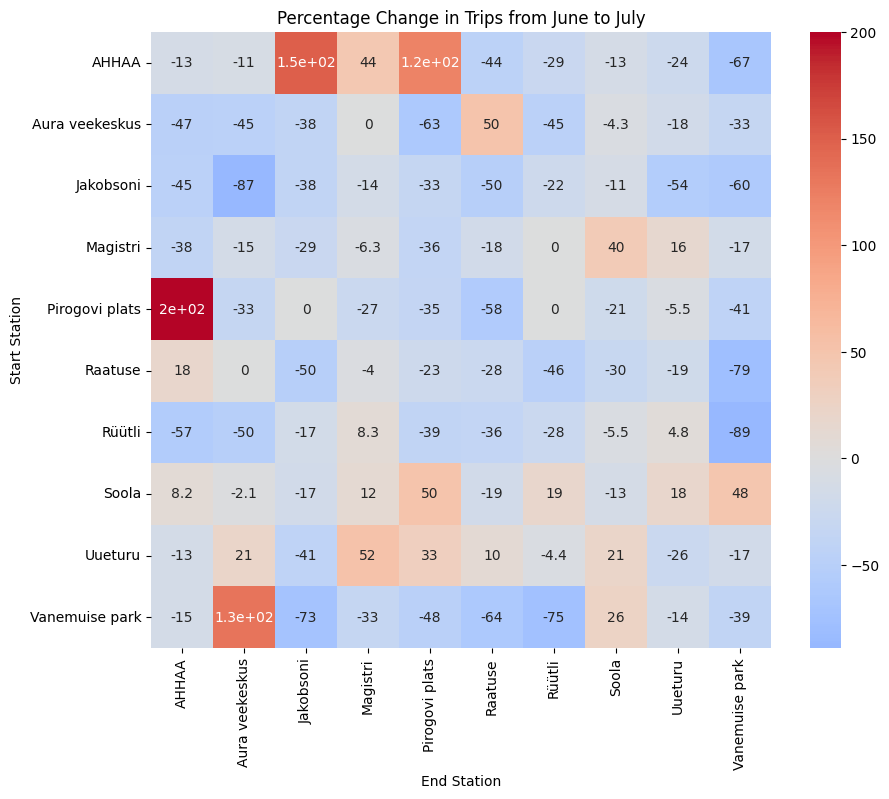

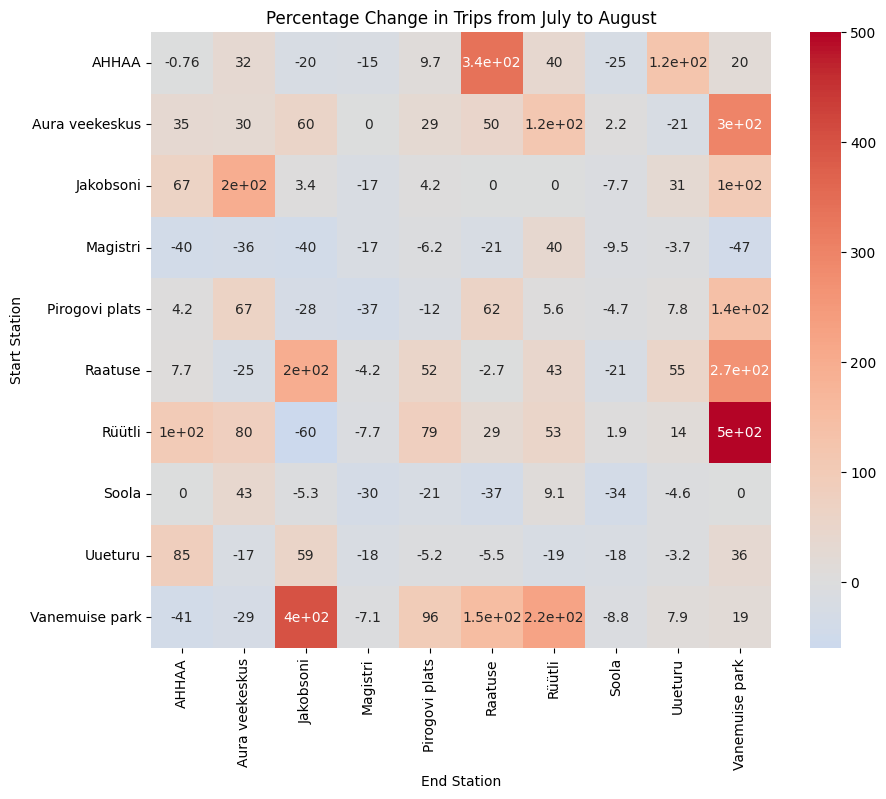

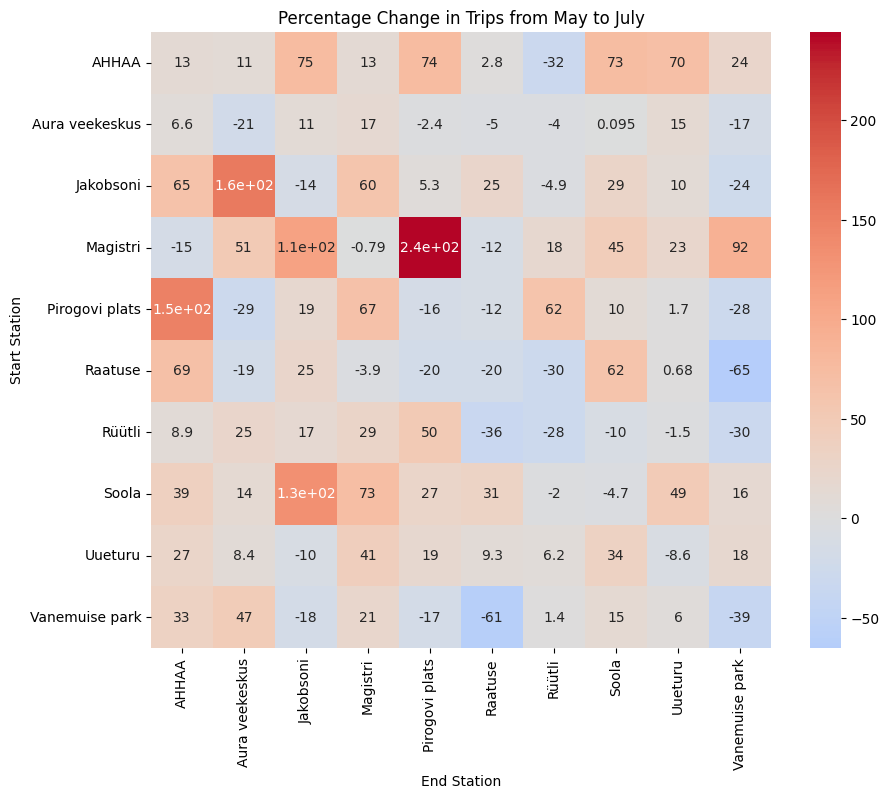

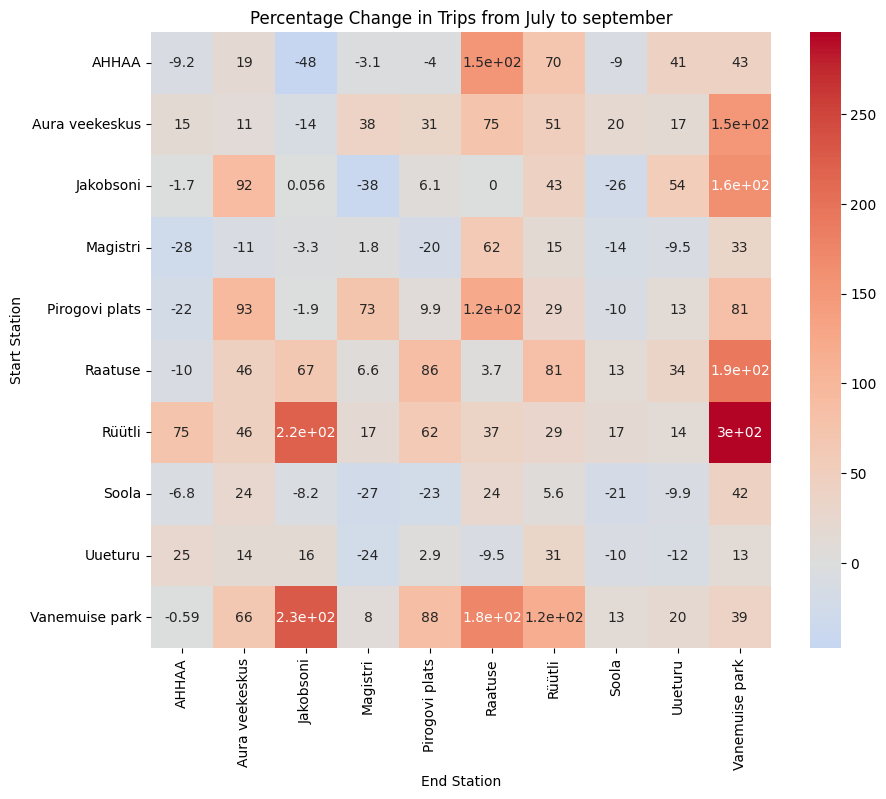

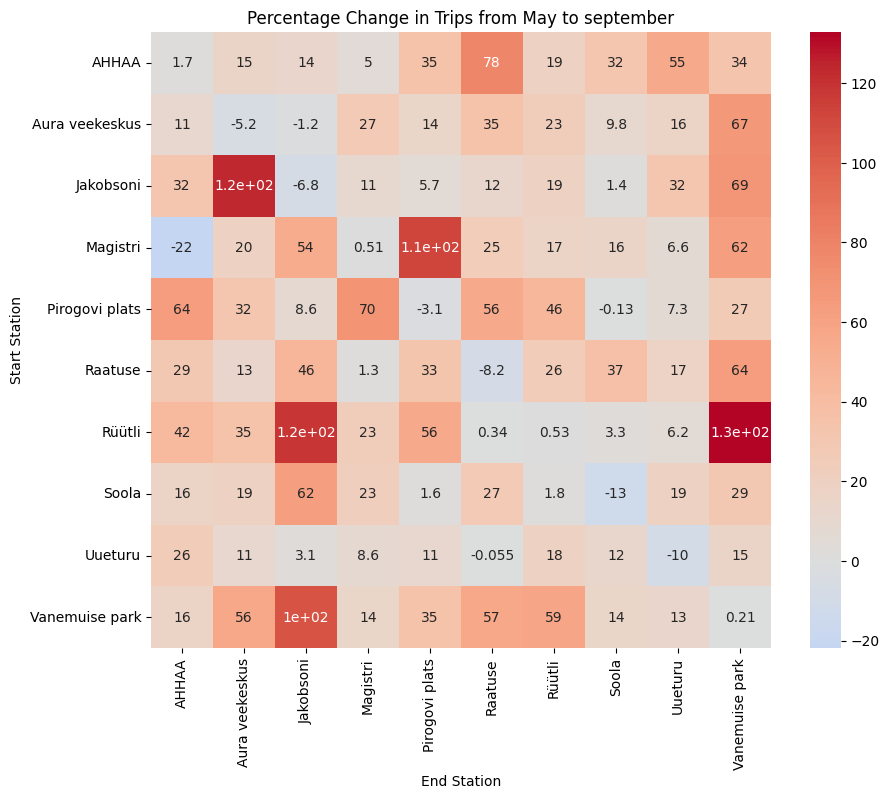

In [21]:
def plot_changes(change_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(change_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(title)
    plt.xlabel('End Station')
    plt.ylabel('Start Station')
    plt.show()

plot_changes(change_june_to_july, 'Percentage Change in Trips from June to July')
plot_changes(change_july_to_august, 'Percentage Change in Trips from July to August')

plot_changes(change_may_to_july, 'Percentage Change in Trips from May to July')
plot_changes(change_july_to_september, 'Percentage Change in Trips from July to september')
plot_changes(change_may_to_september, 'Percentage Change in Trips from May to september')

In [23]:
grouped_df = filtered_data.groupby(['startstationname', 'month']).agg({'duration_minutes': 'mean'}).reset_index()

# Pivot the table to have months as columns
pivot_df = grouped_df.pivot(index='startstationname', columns='month', values='duration_minutes').fillna(0)

# Rename columns for clarity
pivot_df.columns = ['May', 'June', 'July', 'August', 'September']
pivot_df.head(10)


,May,June,July,August,September
startstationname,,,,,
AHHAA,20.856924,22.355487,26.505159,21.115766,17.918614
Aura veekeskus,14.060956,15.648522,14.465062,15.036207,15.532226
Jakobsoni,16.934190,21.920538,19.816667,16.480098,15.051184
Magistri,12.423563,15.788408,16.439714,12.336439,11.293001
Pirogovi plats,15.166048,23.345348,19.632752,19.559623,14.029173
Raatuse,14.930709,16.755778,18.241576,17.523081,12.597349
Rüütli,11.061186,14.907988,16.617794,13.530784,12.656591
Soola,15.538490,16.447675,17.303493,17.111104,14.690670
Uueturu,12.253590,14.636928,15.906272,14.154927,11.976457
